# Examen 1 Curso Básico de Python Lica

Nombre integrante 1:

Nombre integrante 2:

1.- Cargar el dataset de Reviews de Vinos. utilizando solo los campos  'country', 'points','price', 'variety'. \
Nota llame al dataframe wine_reviews

In [1]:
import pandas as pd
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('Clase_05_wine_reviews.txt', sep='\t', encoding="ansi", usecols = fields)
wine_reviews.head()


,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


2.- Liste las primeras 3 lineas y las últimas 3 líneas del dataframe wine_reviews

In [2]:
wine_reviews.head(3)

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris


In [3]:
wine_reviews.tail(3)

,country,points,price,variety
50997,France,92,69.0,Pinot Noir
50998,France,92,70.0,Chardonnay
50999,New Zealand,91,24.0,Chardonnay


3.- Obtenga las dimensiones del dataframe wine_reviews

In [4]:
wine_reviews.shape

(51000, 4)

4.- Calcule la cantidad de valores missing por variable del dataframe wine_reviews

In [5]:
wine_reviews.isna().sum()

country      28
points        0
price      3583
variety       0
dtype: int64

5.- Obtenga la información global del dataframe wine_reviews

In [6]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  50972 non-null  object 
 1   points   51000 non-null  int64  
 2   price    47417 non-null  float64
 3   variety  51000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


6.- Cree una lista con los nombres de las columnas. Verifique que el resultado es una lista.

In [7]:
colnames=wine_reviews.columns.tolist()
print(colnames)
type(colnames)

['country', 'points', 'price', 'variety']


list

7.- Analizar la salida de wine_reviews.describe()

In [8]:
wine_reviews.describe()

,points,price
count,51000.000000,47417.000000
mean,88.447588,35.365966
std,3.051946,39.706123
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,2500.000000


Se debe hacer comentario sobre el promedio, mediana y distribución percentílica de las dos variables.

8.- Agregar al Dataset la información correspondiente a un vino de francia, con puntaje 90, precio = 150 y variedad Pinot Noir. (con indice 51002)  

In [9]:
wine_reviews.shape

(51000, 4)

In [10]:
wine_reviews.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


In [11]:
wine_reviews.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'],
      dtype=object)

In [12]:
wine_reviews.loc[51002] = ['France',90,150, 'Pinot Noir']

In [13]:
wine_reviews.tail(3)

,country,points,price,variety
50998,France,92,70.0,Chardonnay
50999,New Zealand,91,24.0,Chardonnay
51002,France,90,150.0,Pinot Noir


9.- Construya un dataframe donde solo esten los vinos con puntuación entre (85 ; 95] y precio [100 ; 150). \
¿Cuál es la dimensión del nuevo dataframe obtenido?

In [14]:
df=wine_reviews[(wine_reviews.points>85) & (wine_reviews.points<=95) & (wine_reviews.price>=100) & (wine_reviews.price<150)]

In [15]:
df.shape

(859, 4)

In [16]:
df.describe()

,points,price
count,859.00000,859.000000
mean,92.12922,116.781141
std,2.09413,14.083867
min,86.00000,100.000000
25%,91.00000,103.000000
50%,93.00000,115.000000
75%,94.00000,125.000000
max,95.00000,149.000000


10.- Imputar "in situ" los valores faltantes en la columna price usando la mediana.


In [17]:
wine_reviews.price.describe()

count    47418.000000
mean        35.368383
std         39.709194
min          4.000000
25%         17.000000
50%         25.000000
75%         42.000000
max       2500.000000
Name: price, dtype: float64

In [18]:
wine_reviews.fillna(wine_reviews.price.median(), inplace = True)

11.- Analizar el impacto que tiene la imputación de la mediana en el precio del vino. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [19]:
wine_reviews.price.describe()

count    51001.000000
mean        34.639968
std         38.380500
min          4.000000
25%         18.000000
50%         25.000000
75%         40.000000
max       2500.000000
Name: price, dtype: float64

12 .-  Aplique pandas profiling al dataframe wine_reviews. Por favor cuando envíe el examen, anexe el reporte html obtenido al aplicar pandas profiling.

In [20]:
#!pip install pandas-profiling
# https://pypi.org/project/pandas-profiling/
import pandas_profiling

In [21]:
report = pandas_profiling.ProfileReport(df)
report.to_file("report.html")

13.- Graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

In [22]:
wine_reviews.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 25.0, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'],
      dtype=object)

In [23]:
wine_reviews['price'][(wine_reviews['points']==85)&(wine_reviews['country']=='Argentina')].head()

231    10.0
245    12.0
253    15.0
721    14.0
722    25.0
Name: price, dtype: float64

In [24]:
# Seleccionamos los vinos con puntaje igual a 85
ARG_wine_85 = wine_reviews[(wine_reviews['points']==85)&(wine_reviews['country']=='Argentina')]
# Seleccionamos los vinos con puntaje igual a 85
ARG_wine_90 = wine_reviews[(wine_reviews['points']==90)&(wine_reviews['country']=='Argentina')]

# Armamos los vectores con los precios de cada vino
precios_arg_85 = wine_reviews['price'][(wine_reviews['points']==85)&(wine_reviews['country']=='Argentina')].values
precios_arg_90 = wine_reviews['price'][(wine_reviews['points']==90)&(wine_reviews['country']=='Argentina')].values

print('Cantidad de vinos de 85:',len(precios_arg_85))
print('Cantidad de vinos de 90:',len(precios_arg_90))

Cantidad de vinos de 85: 177
Cantidad de vinos de 90: 91


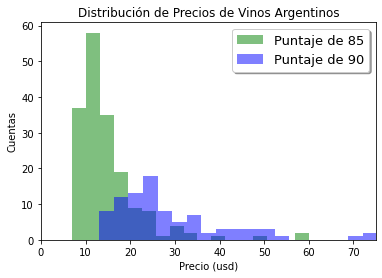

In [25]:
import matplotlib.pyplot as plt
# Definimos la cantidad de bins para cada grupo
n_bins_85 = 17
n_bins_90 = 25

# Creamos la figura y los ejes
fig, ax = plt.subplots()

n, bins, _ = ax.hist(precios_arg_85, n_bins_85, facecolor='g', alpha=0.5, label='Puntaje de 85')
n, bins, _ = ax.hist(precios_arg_90, n_bins_90, facecolor='b', alpha=0.5, label='Puntaje de 90')

ax.set(xlabel='Precio (usd)', ylabel='Cuentas',
       title='Distribución de Precios de Vinos Argentinos', xlim = (0,75))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='upper right', shadow=True, fontsize=13)

14.- Utilizando seaborn realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Francia, España y Portugal).

In [26]:
wine_reviews['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 25.0, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'],
      dtype=object)

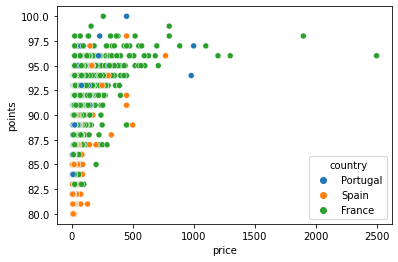

In [27]:
import seaborn as sns

lista_paises = ['Portugal','Spain','France']
wine_reviews_filtradas = wine_reviews[wine_reviews['country'].isin(lista_paises)]
wine_reviews_filtradas.head()

ax = sns.scatterplot(x="price", y="points", hue="country" , data=wine_reviews_filtradas)

15.- Vamos a armara un nuevo dataset solo con los vinos de España, Francia y Portugal, pero esta vez sólo con las siguietnes variedades: 'Portuguese Red', 'Pinot Gris' y 'Tempranillo-Merlot'.

In [28]:
lista_variedades = ['Portuguese Red', 'Pinot Gris', 'Tempranillo-Merlot']
vinos = wine_reviews_filtradas[wine_reviews_filtradas['variety'].isin(lista_variedades)].dropna()
print(vinos.shape)
vinos.head()

(1166, 4)


,country,points,price,variety
1,Portugal,87,15.0,Portuguese Red
5,Spain,87,15.0,Tempranillo-Merlot
9,France,87,27.0,Pinot Gris
139,France,90,112.0,Pinot Gris
143,France,90,84.0,Pinot Gris


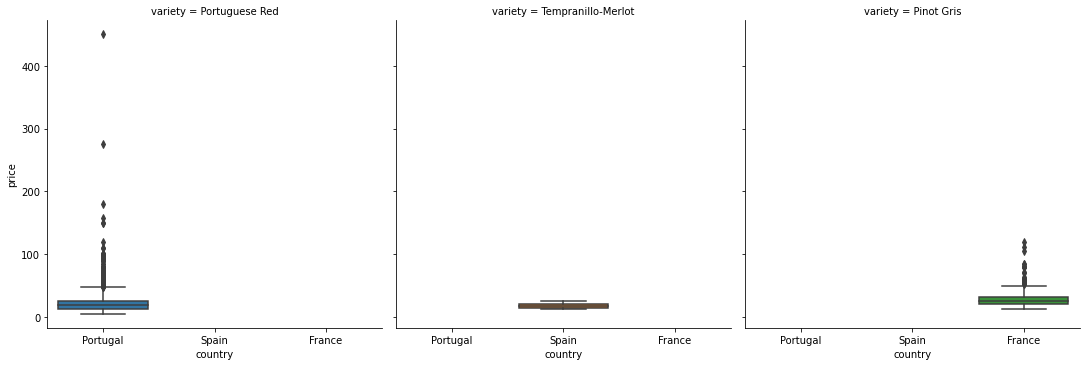

In [29]:
sns.catplot(x="country", y="price", col="variety", kind='box' , data=vinos)

16.- En el último gráfico, era difícil visualizar bien los resultados debido a precios que eran mucho más grandes que los demás. ¿Cómo podría solucionar facilmente este problema?

(0.0, 70.0)

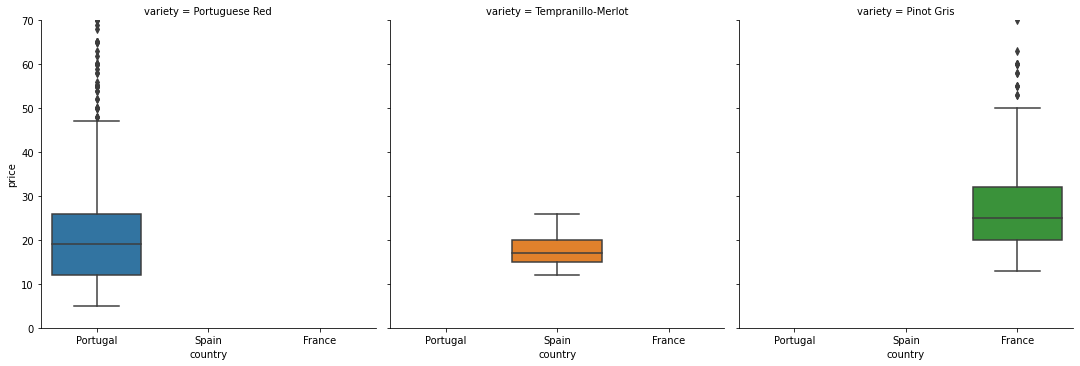

In [30]:
sns.catplot(x="country", y="price", col="variety", kind='box', data=vinos)
plt.ylim(0, 70)

17.- Averigüe cómo cambiar el gráfico si desea que los 3 ejes aparezcan apilados verticalmente en lugar de uno al lado del otro.

(0.0, 100.0)

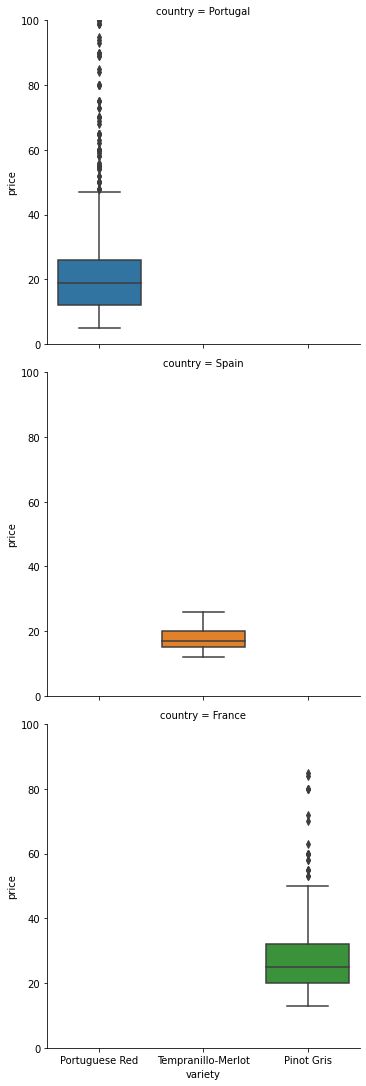

In [31]:
sns.catplot(x="variety", y="price", row="country", kind='box' , data=vinos)
plt.ylim(0, 100)

18.- Realizar un grafico  Pairplots al dataframe solo con los vinos de España, Francia y Portugal, y variedades: 'Portuguese Red', 'Pinot Gris' y 'Tempranillo-Merlot'.

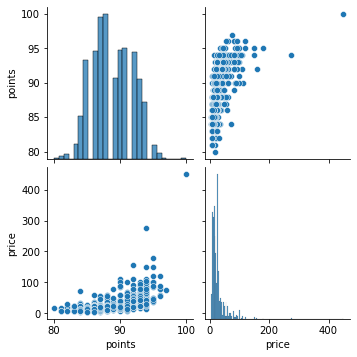

In [32]:
sns.pairplot(data=vinos)

19.- Realizar un grafico pairplot al dataframe solo con los vinos de España, Francia y Portugal, y variedades: 'Portuguese Red', 'Pinot Gris' y 'Tempranillo-Merlot'. (diferenciando por pais, sugerencia utilice hue)

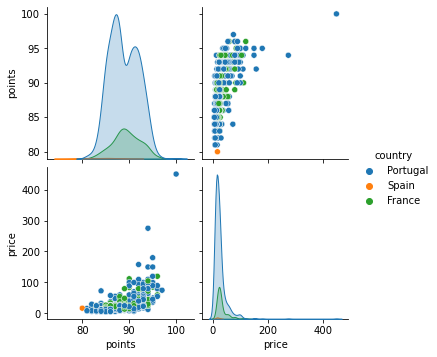

In [33]:
sns.pairplot(data=vinos, hue="country")

20.- Responda los siguientes items:

* ¿Qué es un diccionario? Escribir un ejemplo en una celda.

Un Diccionario es una estructura de datos y un tipo de dato en Python con características especiales que nos permite almacenar cualquier tipo de valor como enteros, cadenas, listas e incluso otras funciones. Estos diccionarios nos permiten además identificar cada elemento por una clave (Key).

In [34]:
# Diccionario
diccionario = {'Key 1': 12, 'Key 2': [1,2,3,4], 'Key 3': 'Puede ser un string'}
print(diccionario)

{'Key 1': 12, 'Key 2': [1, 2, 3, 4], 'Key 3': 'Puede ser un string'}


In [35]:
print(diccionario.keys())

dict_keys(['Key 1', 'Key 2', 'Key 3'])


In [36]:
print(diccionario.values())

dict_values([12, [1, 2, 3, 4], 'Puede ser un string'])


* Indique las diferencias y similitudes entre iloc y loc.

La diferencia entre los dos es la siguiente: loc works on labels en el índice (para decirlo sin rodeos, es el índice de la etiqueta) iloc works on the positions en el índice (por lo que solo toma números enteros). 

La similitud es que ambas permiten seleccionar filas y columnas

* Crear un arreglo de ceros de shape (5,10). Reemplazar la segunda y cuarta fila con unos - Reemplazar la tercera y octava columna con dos (2).

In [37]:
import numpy as np
zeros = np.zeros((5,10))
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
zeros[1,:] = 1
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
zeros[3,:] = 1
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
zeros[:,2] = 2
zeros

array([[0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
zeros[:,7] = 2
zeros

array([[0., 0., 2., 0., 0., 0., 0., 2., 0., 0.],
       [1., 1., 2., 1., 1., 1., 1., 2., 1., 1.],
       [0., 0., 2., 0., 0., 0., 0., 2., 0., 0.],
       [1., 1., 2., 1., 1., 1., 1., 2., 1., 1.],
       [0., 0., 2., 0., 0., 0., 0., 2., 0., 0.]])